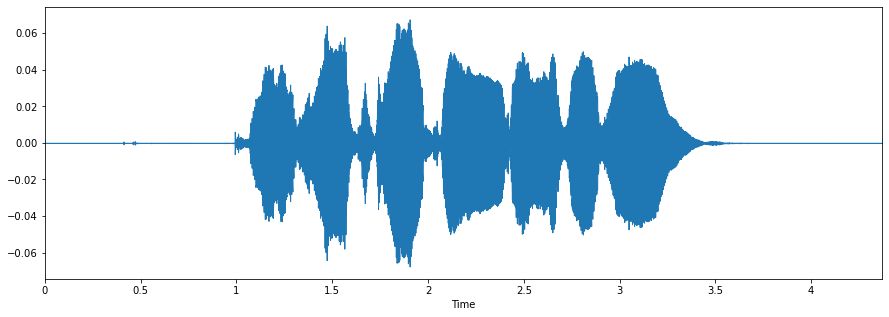

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os
import os
import pandas as pd
import librosa
import glob


mylist= os.listdir('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data')

data, sampling_rate = librosa.load('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data\\03-02-02-01-01-01-01.wav', sr=None)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)


<ipython-input-2-577bdee5b7d7>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data\\03-02-02-01-01-01-01.wav')
<ipython-input-2-577bdee5b7d7>:20: RuntimeWarning: divide by zero encountered in log
  X[i,:] = np.log(np.abs(z[:nfft//2]))


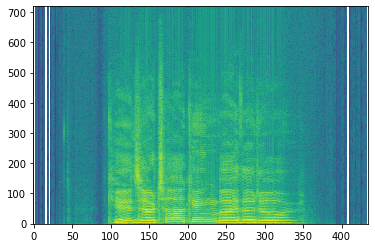

In [2]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

sr,x = scipy.io.wavfile.read('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data\\03-02-02-01-01-01-01.wav')
## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [19]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[6:-16]=='07' and int(item[18:-4])%2==0:
        feeling_list.append('female_disgust')
    elif item[6:-16]=='07' and int(item[18:-4])%2==1:
        feeling_list.append('male_disgust')
    elif item[6:-16]=='08' and int(item[18:-4])%2==0:
        feeling_list.append('female_surprised')
    elif item[6:-16]=='08' and int(item[18:-4])%2==1:
        feeling_list.append('male_surprised')
    elif item[6:-16]=='01' and int(item[18:-4])%2==0:
        feeling_list.append('female_neutral')
    elif item[6:-16]=='01' and int(item[18:-4])%2==1:
        feeling_list.append('male_neutral')
        
labels = pd.DataFrame(feeling_list)
# labels = labels.rename(columns={0:'label'})
labels

,0
0,male_neutral
1,female_neutral
2,male_neutral
3,female_neutral
4,male_neutral
...,...
2447,female_fearful
2448,male_fearful
2449,female_fearful
2450,male_fearful


In [20]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
        X, sample_rate = librosa.load('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data\\'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13), axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [21]:
df3 = pd.DataFrame(df['feature'].values.tolist())
newdf = pd.concat([df3,labels.rename(columns={0:'label'})], axis=1)

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(newdf, test_size=0.2, random_state=42, shuffle=True)
train[250:260]


,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
2036,-60.209480,-60.209480,-60.209480,-60.088562,-58.715797,-54.749310,-52.042637,-52.925400,-55.275627,-56.429695,...,-26.352369,-27.475554,-26.447857,-26.714699,-26.495314,-24.883787,-24.697395,-22.800629,-19.670515,male_sad
2110,-51.904087,-51.904087,-51.904087,-51.904087,-51.904087,-51.904087,-51.904087,-51.904087,-51.904087,-51.904087,...,-38.715065,-40.345486,-40.094910,-41.059475,-40.586716,-39.223812,-38.645435,-28.407076,-21.569149,female_angry
1459,-53.994370,-53.441128,-54.648922,-56.159752,-56.159752,-56.159752,-56.159752,-56.159752,-56.159752,-55.050842,...,-25.538219,-24.798429,-24.542253,-25.143972,-25.797091,-26.672289,-27.058432,-17.848280,-12.437347,male_neutral
59,-60.817608,-61.261333,-62.465374,-60.676243,-58.805038,-59.655266,-60.029678,-58.824524,-56.771675,-57.432365,...,-53.094276,-54.743469,-54.017597,-56.499363,-58.660625,-59.410954,-58.967201,-58.878319,-59.005173,female_neutral
1401,-46.203671,-45.334408,-45.702919,-46.263218,-45.346855,-45.281048,-45.459846,-44.735985,-44.171616,-44.730606,...,-44.283184,-41.835426,-41.592331,-44.347080,-44.086449,-44.029789,-44.619469,-44.980362,-45.238579,female_surprised
1260,-60.508060,-58.803352,-57.924438,-58.851334,-60.679855,-60.679855,-60.679855,-60.679855,-60.679855,-60.679855,...,-57.352970,-55.825027,-54.988583,-54.154156,-53.696838,-54.792480,-55.176937,-58.040207,-58.879757,male_surprised
207,-62.748089,-62.748234,-62.759155,-62.761147,-62.758549,-62.763565,-62.760700,-62.748234,-62.748234,-62.774876,...,-39.684158,-43.283527,-44.693192,-42.968468,-41.411919,-44.474094,-46.436646,-44.065308,-40.537678,female_calm
1925,-55.970695,-55.970695,-55.970695,-55.970695,-55.783577,-55.479370,-55.970695,-55.970695,-55.970695,-55.970695,...,-26.304348,-26.619703,-25.921925,-26.594337,-28.670946,-30.337614,-28.943281,-26.408756,-23.380388,male_sad
1490,-54.201443,-55.196712,-56.912979,-57.382526,-56.256401,-56.351601,-56.374165,-56.143940,-57.557774,-59.679192,...,-32.475094,-32.352104,-31.802147,-33.007523,-35.675014,-35.558220,-36.136295,-36.439789,-35.173801,male_neutral
1557,-50.533878,-49.964298,-49.754581,-49.126335,-46.739502,-46.507713,-46.690823,-46.533653,-44.836617,-46.443535,...,-22.327782,-23.815105,-26.549183,-25.484396,-26.398602,-28.429680,-26.572523,-21.619587,-19.035383,male_calm


In [23]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]



In [24]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

oof = lb.fit_transform(y_test)
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

c:\users\kalelt'has\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [25]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
x_traincnn.shape

(1961, 216, 1)

In [26]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 216, 256)          1536      
_________________________________________________________________
activation_15 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 216, 128)          163968    
_________________________________________________________________
activation_16 (Activation)   (None, 216, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 27, 128)          

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])


In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))


Epoch 1/700
123/123 [==============================] - 12s 99ms/step - loss: nan - accuracy: 0.0719 - val_loss: nan - val_accuracy: 0.0794
Epoch 2/700
123/123 [==============================] - 11s 92ms/step - loss: nan - accuracy: 0.0739 - val_loss: nan - val_accuracy: 0.0794
Epoch 3/700
123/123 [==============================] - 10s 80ms/step - loss: nan - accuracy: 0.0739 - val_loss: nan - val_accuracy: 0.0794
Epoch 4/700
123/123 [==============================] - 11s 87ms/step - loss: nan - accuracy: 0.0739 - val_loss: nan - val_accuracy: 0.0794
Epoch 5/700
123/123 [==============================] - 11s 88ms/step - loss: nan - accuracy: 0.0739 - val_loss: nan - val_accuracy: 0.0794
Epoch 6/700
123/123 [==============================] - 11s 88ms/step - loss: nan - accuracy: 0.0739 - val_loss: nan - val_accuracy: 0.0794
Epoch 7/700
123/123 [==============================] - 10s 81ms/step - loss: nan - accuracy: 0.0739 - val_loss: nan - val_accuracy: 0.0794
Epoch 8/700
123/123 [======

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


